Этот файл генерирует другой пример control set из коротких прмиитивов (в тексте диплома он не встречался,
но его можно использовать аналогично main_control_set.txt)

In [1]:
import matplotlib.pyplot as plt
from create_prims_file import save_and_show
from trajectory_optimization import optimization_Newton 
import sys
sys.path.append("../common/")
from KC_structs import *
from KC_graphics import *
%matplotlib inline  

In [2]:
theta_16 = Theta()
primitives_file = "short_control_set.txt" 

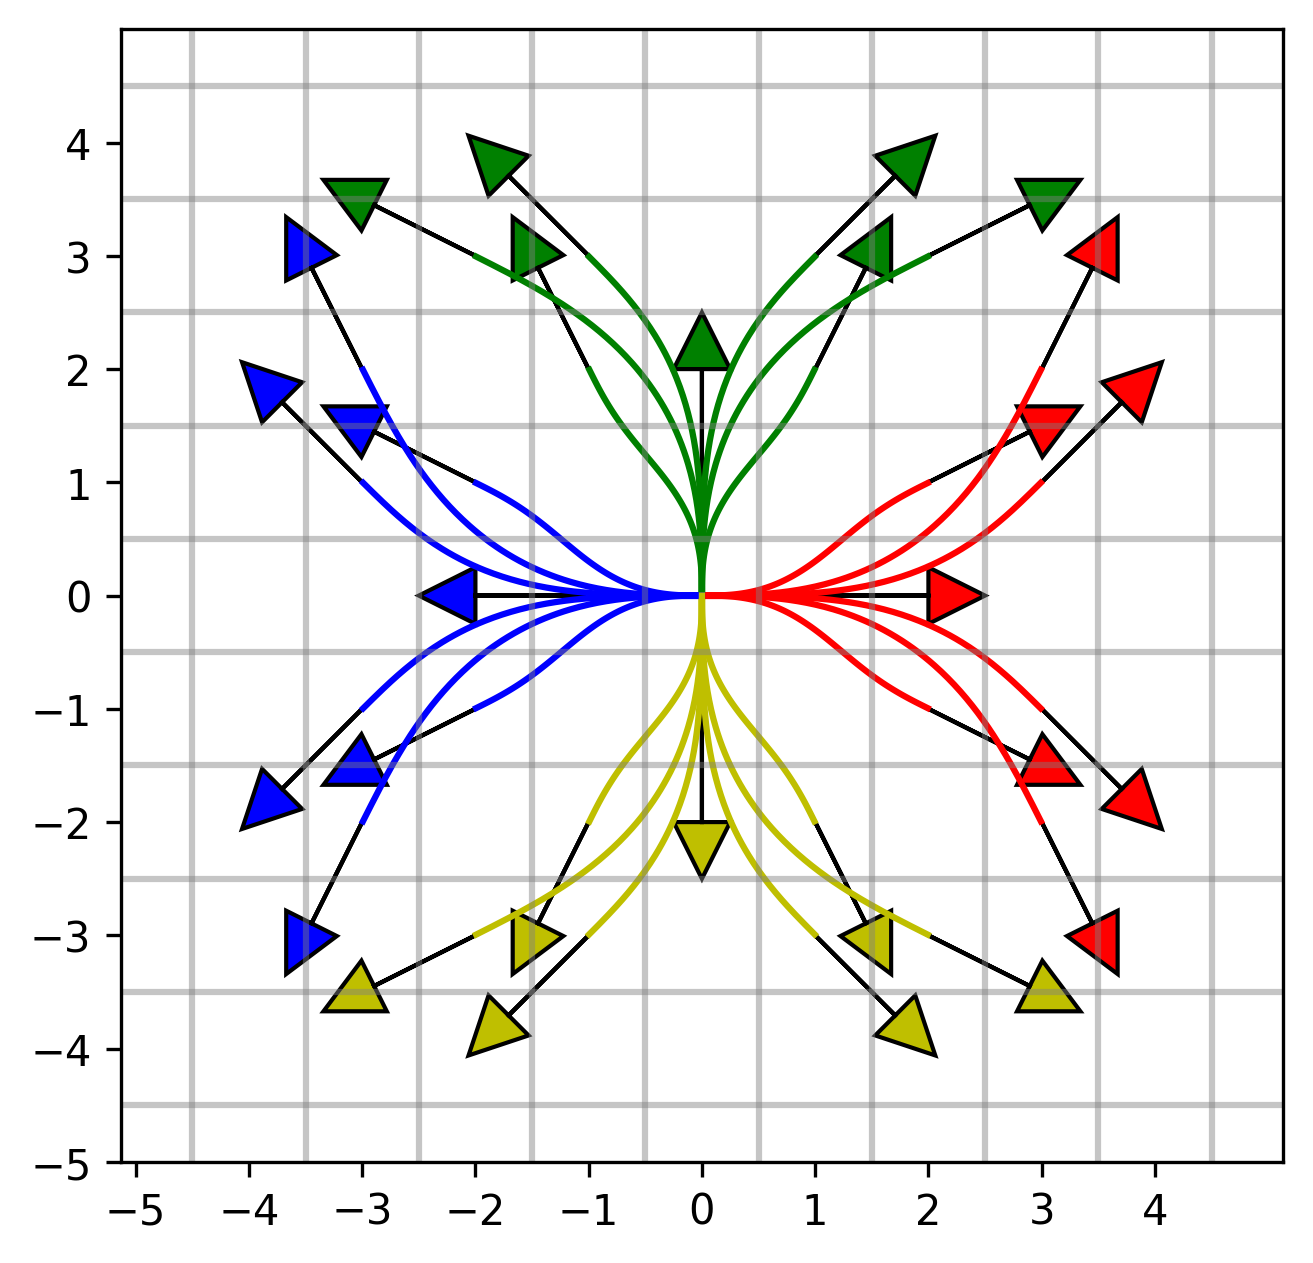

In [3]:
start = State(x=0, y=0, theta=theta_16[0])  # для угла 0

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(111)

for target in [State(x=1.0, y=0.0, theta=theta_16[0]),
               
               State(x=2.0, y=1.0, theta=theta_16[1]),
               State(x=3.0, y=1.0, theta=theta_16[2]),
               State(x=3.0, y=2.0, theta=theta_16[3]),
               
               State(x=2.0, y=-1.0, theta=theta_16[-1]),
               State(x=3.0, y=-1.0, theta=theta_16[-2]),
               State(x=3.0, y=-2.0, theta=theta_16[-3])]:
    
    prim = optimization_Newton(start=start, goal=target, show_animation=False)
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)

draw_grid(ax, xs=-5, ys=-5, xf=5, yf=5)
plt.show()

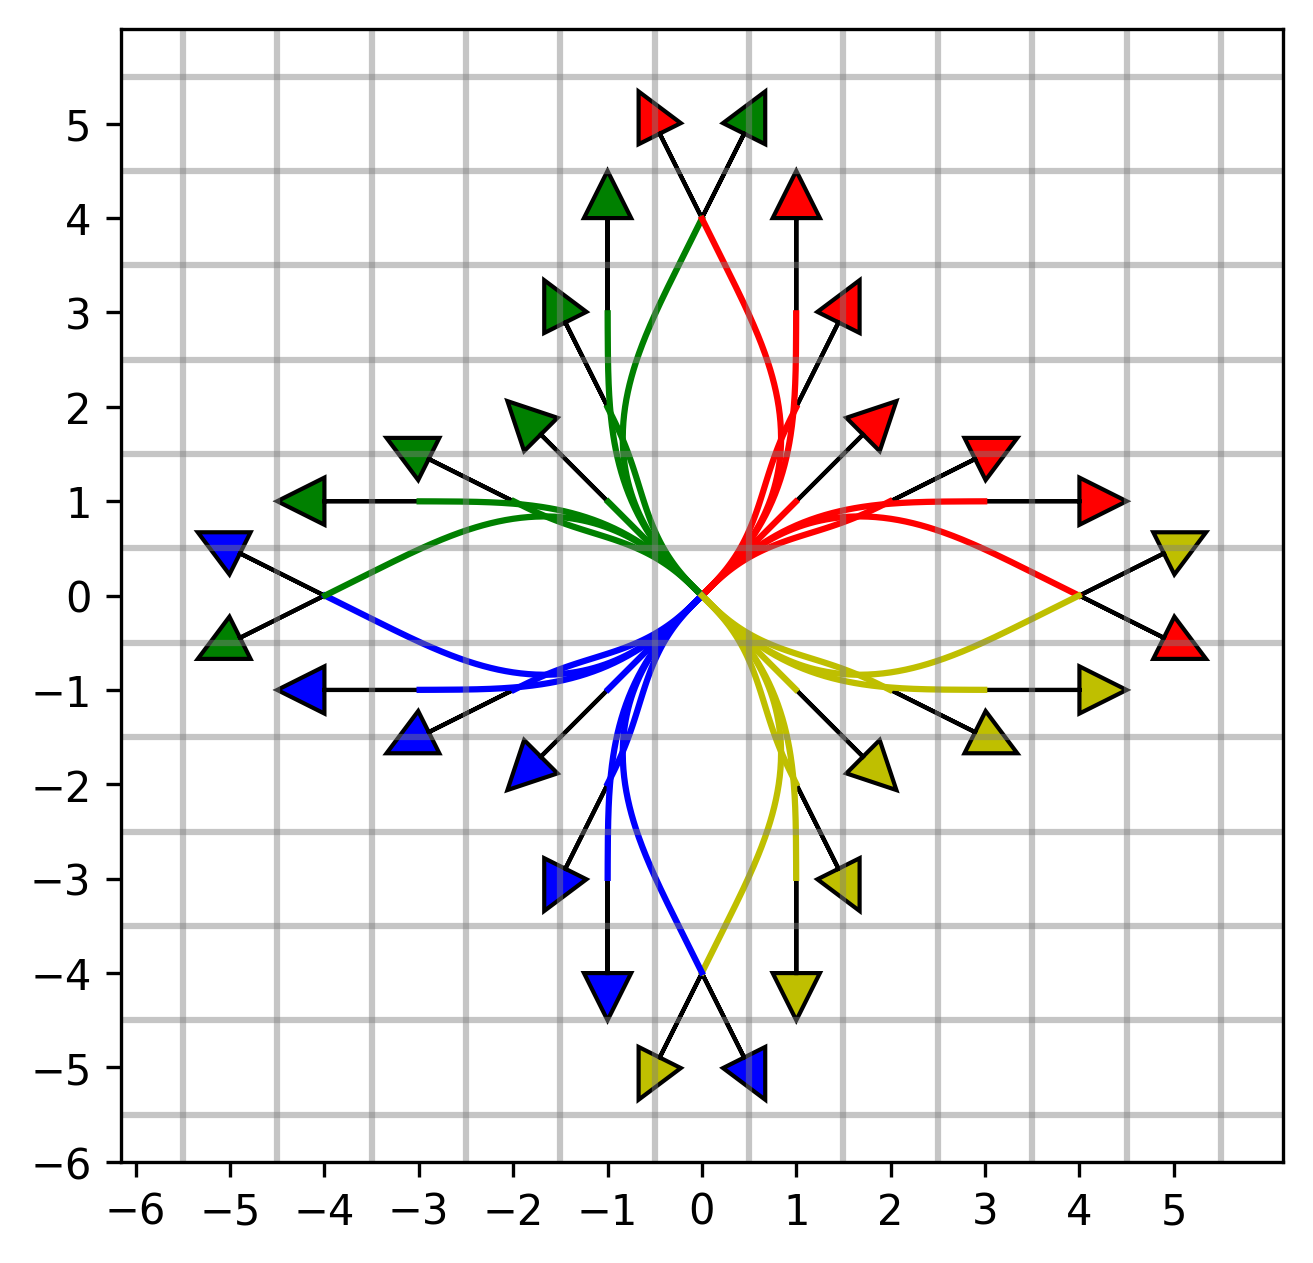

In [4]:
start = State(x=0, y=0, theta=theta_16[2])  # для угла 2

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(111)

for target in [State(x=1.0, y=1.0, theta=theta_16[2]),
               
               State(x=2.0, y=1.0, theta=theta_16[1]),
               State(x=3.0, y=1.0, theta=0),
               State(x=4.0, y=0.0, theta=theta_16[-1]),
               
               State(x=1.0, y=2.0, theta=theta_16[3]),
               State(x=1.0, y=3.0, theta=theta_16[4]),
               State(x=0.0, y=4.0, theta=theta_16[5])]:
    
    prim = optimization_Newton(start=start, goal=target, show_animation=False)
    save_and_show(file=primitives_file, prim=prim, theta_discrete=theta_16)

draw_grid(ax, xs=-6, ys=-6, xf=6, yf=6)
plt.show()

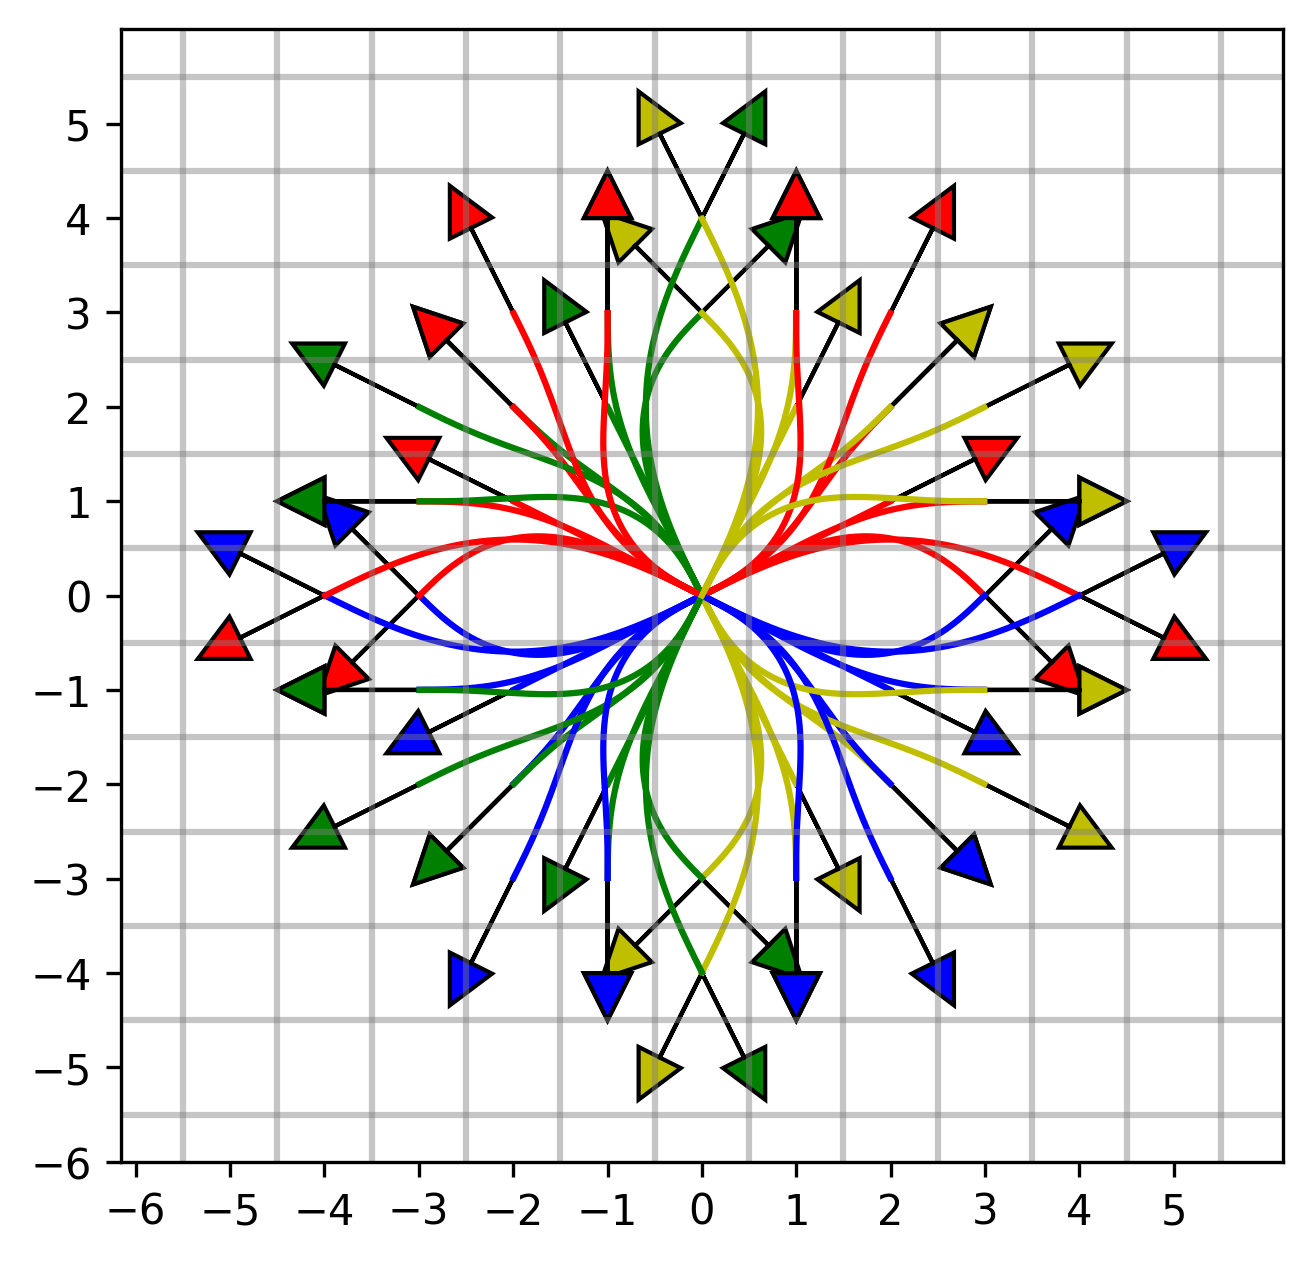

In [5]:
# для угла 1 и 7

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(111)

for target in [State(x=2.0, y=1.0, theta=theta_16[1]),
               
               State(x=3.0, y=1.0, theta=theta_16[0]),
               State(x=4.0, y=0.0, theta=theta_16[-1]),
               State(x=3.0, y=0.0, theta=theta_16[-2]),
         
               State(x=2.0, y=2.0, theta=theta_16[2]),
               State(x=2.0, y=3.0, theta=theta_16[3]),
               State(x=1.0, y=3.0, theta=theta_16[4])]:
    
    start = State(x=0, y=0, theta=theta_16[1]) 
    
    prim = optimization_Newton(start=start, goal=target, show_animation=False)
    save_and_show(file=primitives_file, prim=prim, theta_discrete=theta_16)
    
    # отражаем относительно оси Y все примитивы и тоже сохраняем:
    prim.start = State(prim.start.x, prim.start.y, theta_16[7], -prim.k0)  # меняем начальный угол и симметрим кривизну
    prim.goal = State(-prim.goal.x, prim.goal.y, theta_16[7] - (prim.goal.theta - theta_16[1]))  # меняем конченое положение (симметрично от Y)
    prim.set_coef_params(-prim.a, -prim.b, -prim.c, prim.length)  # при симметрии примитив поворачивает в другую сторону ->
                                                                  # -> кривизна меняет занк
    save_and_show(file=primitives_file, prim=prim, theta_discrete=theta_16)

draw_grid(ax, xs=-6, ys=-6, xf=6, yf=6)
plt.show()